In [1]:
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)

(38932, 5)


In [4]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
print(df['Is_Response'].nunique())
response_count = df['Is_Response'].value_counts()
response_count

2


happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [6]:
print(df['Browser_Used'].value_counts())

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64


In [7]:
print(df['Device_Used'].value_counts())

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Sentiment Count')

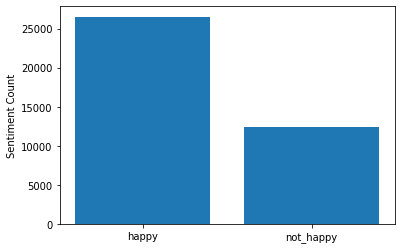

In [9]:
index = [1,2]
plt.bar(index,response_count)
plt.xticks(index,['happy','not_happy'])
plt.ylabel('Sentiment Count')

Positive Response Analysis

In [10]:
response_positive = df[df['Is_Response']=='happy']

In [11]:
words = ' '.join(response_positive['Description'])

In [12]:
b_words = len(words)

In [13]:
stops = set(STOPWORDS)

In [14]:
words = ' '.join(word for word in words.split(' ')if word not in stops)

In [15]:
a_words = len(words)
a_words

14600181

In [16]:
print("Ratio of words after and before removal of stopwords ",(a_words/b_words))

Ratio of words after and before removal of stopwords  0.7006708408214601


Postive Response WordCloud


(-0.5, 4999.5, 3999.5, -0.5)

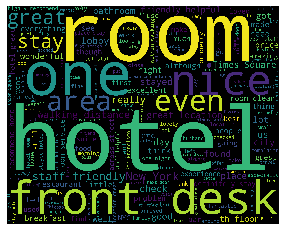

In [17]:
print("Postive Response WordCloud")
wordcloud = WordCloud(stopwords = STOPWORDS,height=4000,width=5000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')

Negative Response Analysis

In [18]:
response_negative = df[df['Is_Response']=='not happy']

In [19]:
words = ' '.join(response_negative['Description'])

In [20]:
b_words = len(words)

In [21]:
words = ' '.join(word for word in words.split(' ')if word not in stops)

In [22]:
a_words = len(words)

In [23]:
print("Ratio of words after and before removal of stopwords ",(a_words/b_words))

Ratio of words after and before removal of stopwords  0.6819509515234881


Negative Response WordCloud


(-0.5, 4999.5, 3999.5, -0.5)

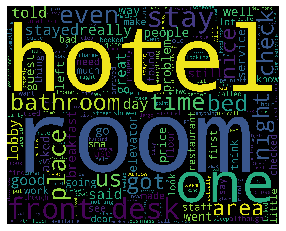

In [24]:
print("Negative Response WordCloud")
wordcloud = WordCloud(stopwords = STOPWORDS,height=4000,width=5000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')

In [25]:
df['sentiment'] = df['Is_Response'].apply(lambda x:0 if x=='not happy' else 1)

In [26]:
df['sentiment'].value_counts()

1    26521
0    12411
Name: sentiment, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
count_vec = CountVectorizer(analyzer ="word")

In [29]:
df_input = df['Description']
df_output = df['sentiment']

In [30]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [31]:
df_input,df_output = shuffle(df_input,df_output,random_state = 42)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(df_input,df_output,random_state=42)

In [33]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
stops.update(':',',','!','.','" "',"' '")

In [34]:
count_vec_ngrams = CountVectorizer(analyzer = "word", ngram_range = (1,2))

In [35]:
train_features = count_vec.fit_transform(x_train)
train_features_grams = count_vec_ngrams.fit_transform(x_train)

In [36]:
test_features = count_vec.transform(x_test)
test_features_grams = count_vec_ngrams.transform(x_test)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

#DecisionTree

In [38]:
clf = DecisionTreeClassifier()
clf_grams = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf_grams.fit(train_features_grams,y_train)
print(clf.score(test_features,y_test))
print(clf_grams.score(test_features_grams,y_test))

0.7562930237336896
0.7637932805918011


MultinomialNB

In [39]:
clf = MultinomialNB()
clf_grams = MultinomialNB()
clf.fit(train_features,y_train)
clf_grams.fit(train_features_grams,y_train)
print(clf.score(test_features,y_test))
print(clf_grams.score(test_features_grams,y_test))

0.8650981197986233
0.8712627144765231


In [40]:
TF = TfidfVectorizer()
train_features = TF.fit_transform(x_train)
test_features = TF.transform(x_test)

In [41]:
clf = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.7518750642145279

In [42]:
clf = MultinomialNB()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.7937943080242474

MultinomialNB is giving high score than DecisionTree. Score is lower when using TfidfVectorizer

In [43]:
from collections import Counter
from nltk import word_tokenize

In [45]:
words = ' '.join(df['Description'])

In [46]:
words = ' '.join(word for word in words.split(' ') if word not in stops)

In [48]:
list_words = word_tokenize(words)

In [49]:
counts = Counter(list_words)

In [50]:
counts

Counter({'The': 78953,
         'room': 59024,
         'kind': 1714,
         'clean': 15342,
         'VERY': 681,
         'strong': 264,
         'smell': 1113,
         'dogs': 260,
         '.': 351125,
         'Generally': 54,
         'average': 1424,
         'ok': 1212,
         'overnight': 584,
         'stay': 25980,
         'fussy': 67,
         'Would': 1536,
         'consider': 645,
         'staying': 4466,
         'price': 6132,
         'right': 6551,
         'Breakfast': 1731,
         'free': 7991,
         'better': 4734,
         'nothing': 2517,
         'I': 108764,
         'stayed': 14726,
         'Crown': 69,
         'Plaza': 721,
         'April': 311,
         '--': 53615,
         '-': 52345,
         ',': 231523,
         'staff': 22406,
         'friendly': 10296,
         'attentive': 830,
         'elevators': 1601,
         'tiny': 1239,
         '(': 29083,
         'about': 595,
         "'": 2214,
         ')': 30224,
         'food': 5544,

In [51]:
counts.most_common(20)

[("''", 557487),
 ('.', 351125),
 (',', 231523),
 ('I', 108764),
 ('The', 78953),
 ('hotel', 65861),
 ('room', 59024),
 ('--', 53615),
 ('-', 52345),
 ('!', 38512),
 ('We', 33955),
 (')', 30224),
 ('(', 29083),
 ('stay', 25980),
 ('staff', 22406),
 ('great', 22230),
 ('would', 20608),
 ('rooms', 18262),
 ('good', 17605),
 ('nice', 17149)]

In [52]:
df_input = df['Description']
df_output = df['sentiment']

In [53]:
stops = set(STOPWORDS)

In [54]:
#Eliminate common high frequency words
stops.update('.','.',':','I','The',')','(','We','-','--','hotel','room','rooms')

In [56]:
df_input[0]

"The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."

In [60]:
count_vec = CountVectorizer(analyzer = "word")
count_vec_ngrams = CountVectorizer(analyzer = "word", ngram_range = (1,2))
train_features = count_vec.fit_transform(df_input)
train_features_grams = count_vec_ngrams.fit_transform(df_input)

In [61]:
y_train = df['sentiment']

In [62]:
clf = MultinomialNB()
clf_grams = MultinomialNB()
clf_grams.fit(train_features_grams,y_train)
clf.fit(train_features,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
df_test = pd.read_csv('test.csv')

In [64]:
df_test.shape

(29404, 4)

In [65]:
df_test_final = df_test['Description']

In [66]:
test_features = count_vec.transform(df_test_final)
test_features_grams = count_vec_ngrams.transform(df_test_final)

In [67]:
prediction = clf.predict(test_features)

In [68]:
df_test['Is_Response'] = prediction

In [69]:
df_test['Is_Response'] = df_test['Is_Response'].apply(lambda x:'not_happy' if x==0 else 'happy')

In [74]:
df_result = df_test[['User_ID','Description','Is_Response']]

In [75]:
df_result.to_csv('test_result.csv',columns=['User_ID','Description','Is_Response'],index=False)